# XGBoost

## What makes XGBoost so popular?

* **Speed and performance**
* **Core algorithm is parallelizable**
* **Consistently outperforms other algorithm methods**
* **Wide variety of tuning parameters**

XGBoost belongs to a family of boosting algorithms and uses the gradient boosting framework at its core. It is an optimized distributed gradient boosting library.

## What is Boosting?

Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy.

The basic idea behind boosting algorithms is building a weak model, making conclusions about the various feature importance and parameters, and then using those conclusions to build a new, stronger model and capitalize on the misclassification error of the previous model and try to reduce it.

Default base learners of XGBoost: tree ensembles.

In this tutorial, you will be using XGBoost to solve a regression problem.

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.data.shape)

(506, 13)


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
import pandas as pd

In [7]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
data['PRICE'] = boston.target

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [12]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [13]:
# Convert the dataset into an optimized data structure
# called Dmatrix that XGBoost supports
data_dmatrix = xgb.DMatrix(data=X, label=y)

/Users/jaime/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/jaime/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


## XGBoost's hyperparameters

* `learning_rate`: a step size shrinkage used to prevent overfitting
* `max_depth`: determines how deeply each tree is allowed to grow during any boosting round
* `subsample`: percentage of sampels used per tree. Low value can lead to underfitting.
* `colsample_bytree`: percentage of features used per tree. High value can lead to overfitting.
* `n_estimators`: number of trees you want to build.
* `objective`: determines the loss function to be used like `reg:linear` for regression problems, `reg:logistic` for classification problems with only decision, `binary:logistic` for classification problems with probability.
* `gamma`: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
* `alpha`: L1 reg on leaf weights. A large value leads to more regularization.
* `lambda`: L2 reg on leaf weights and is smoother than L1 reg.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

In [16]:
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=10
)

In [17]:
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [18]:
preds = xg_reg.predict(X_test)

In [19]:
import numpy as np

In [20]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE: {rmse}")

RMSE: 10.397586902790632


## K-fold Cross Validation using XGBoost

In [21]:
params = {
    "objective": "reg:squarederror",
    "colsample_bytree": 0.3,
    "learning_rate": 0.1,
    "max_depth": 5,
    "alpha": 10
}

In [22]:
cv_results = xgb.cv(
    dtrain=data_dmatrix,
    params=params,
    nfold=3,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics="rmse",
    as_pandas=True,
    seed=123
)

In [23]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680255,0.025604,21.719119,0.019027
1,19.740498,0.072069,19.818879,0.061769
2,18.007202,0.119743,18.109863,0.129374
3,16.463924,0.115088,16.587236,0.182337
4,14.990312,0.112000,15.132977,0.166282


In [24]:
print(cv_results["test-rmse-mean"].tail(1))

49    3.862102
Name: test-rmse-mean, dtype: float64


In [25]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [26]:
import matplotlib.pyplot as plt

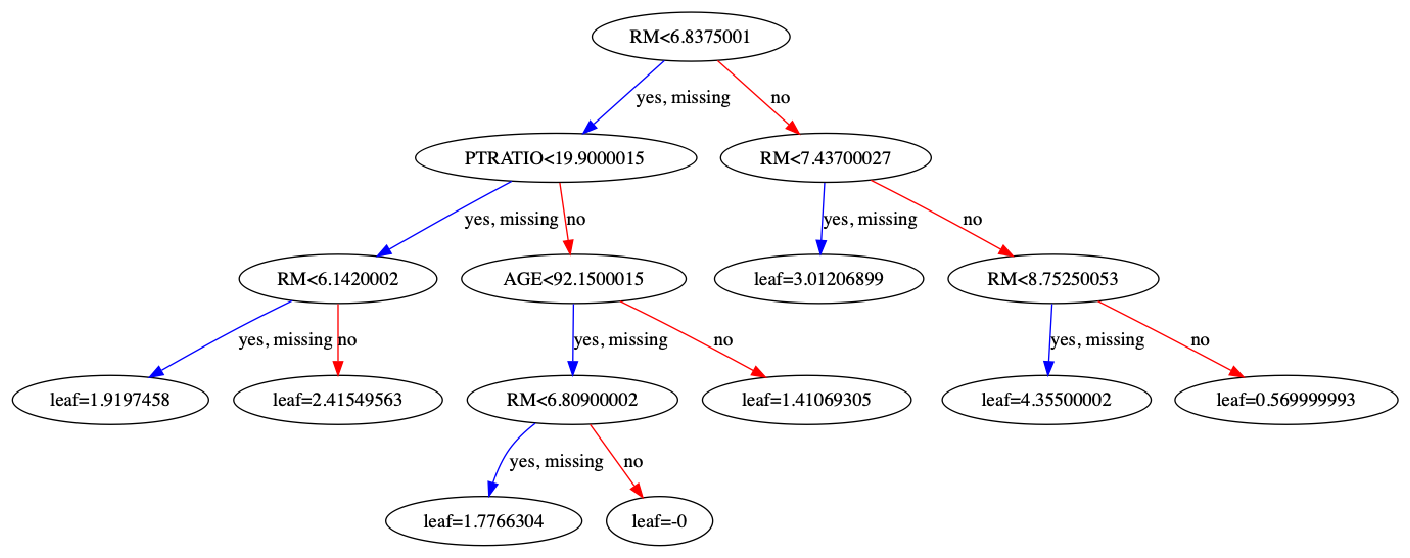

In [31]:
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams["figure.figsize"] = [60, 20]
plt.show()

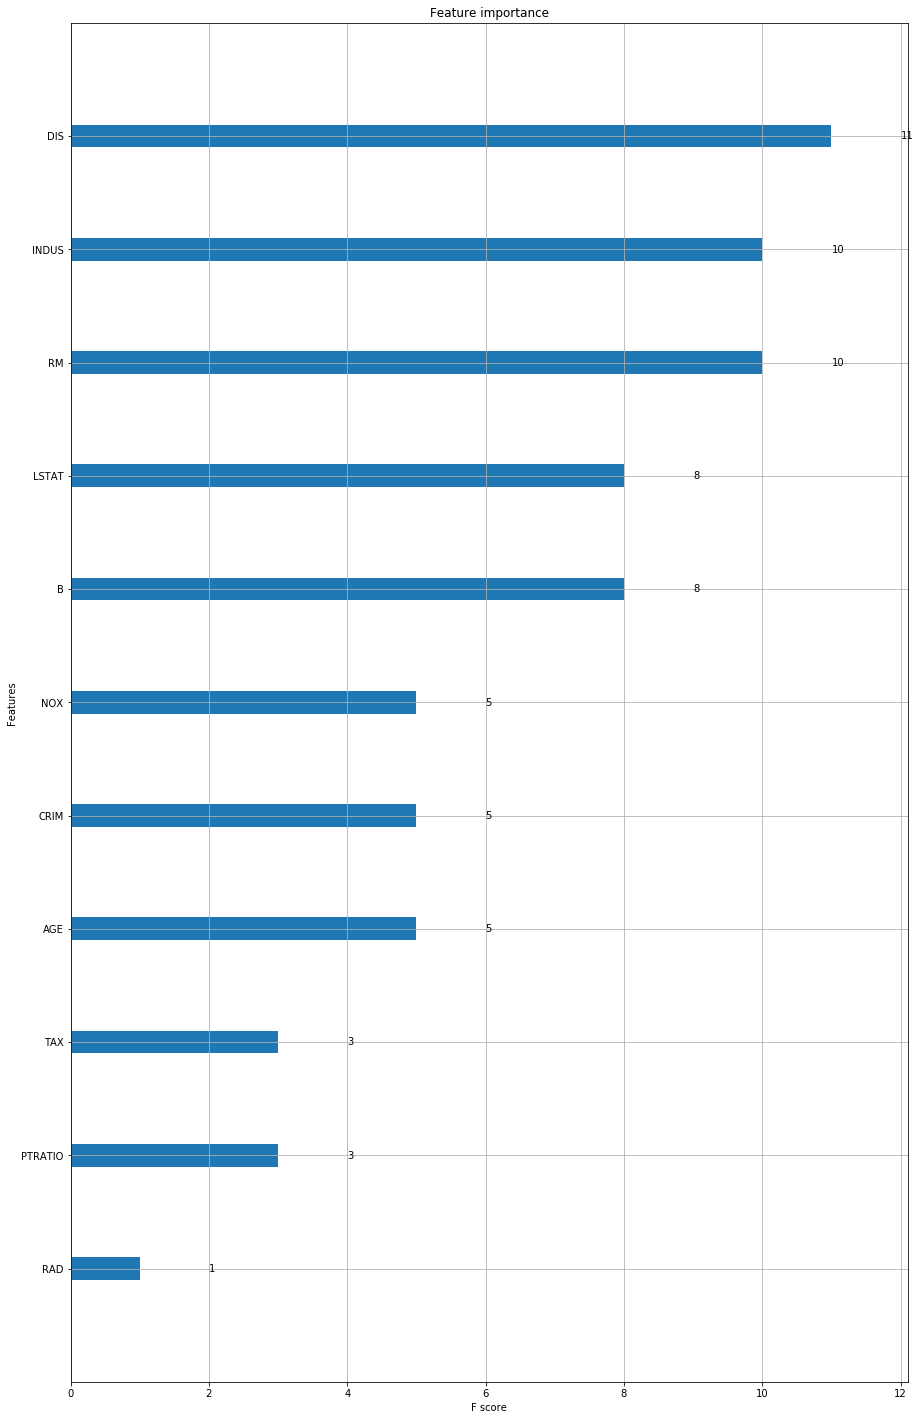

In [37]:
xgb.plot_importance(xg_reg)
plt.rcParams["figure.figsize"] = [15, 5]
plt.show()